In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
data=pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
28    1280
37    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
24    1206
39    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
50     866
18     862
49     847
48     845
52     738
53     711
55     621
54     613
17     595
56     564
58     555
57     551
59     523
61     450
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, dtype: int64

<AxesSubplot:xlabel='age'>

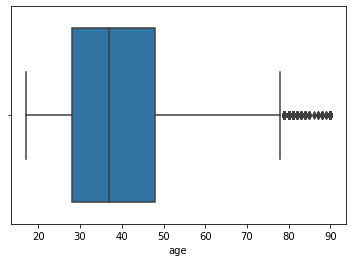

In [8]:
#checking for outlier
import warnings
warnings.filterwarnings("ignore")
sns.boxplot(data['age'])

In [9]:
#removing outlier
def no_outt(df,ft):
    q1=df[ft].quantile(.25)
    q3=df[ft].quantile(.75)

    IQR=q3-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q3+1.5*IQR
    
    lst=df.index[(df[ft]<lower_limit)|(df[ft]>upper_limit)]
    return lst

In [10]:
index_list=[]
for f in ['age','fnlwgt']:
    index_list.extend(no_outt(data,f))
    

In [11]:
def remove(df1,ft): #defining function to remove outlier in columns
  
    df1=data.drop(ft)
    return df1

In [12]:
df=remove(data,index_list)  
df.shape

(47174, 15)

In [13]:
data.shape #before outlier

(48842, 15)

<AxesSubplot:title={'center':'Removed many outliers'}, xlabel='age'>

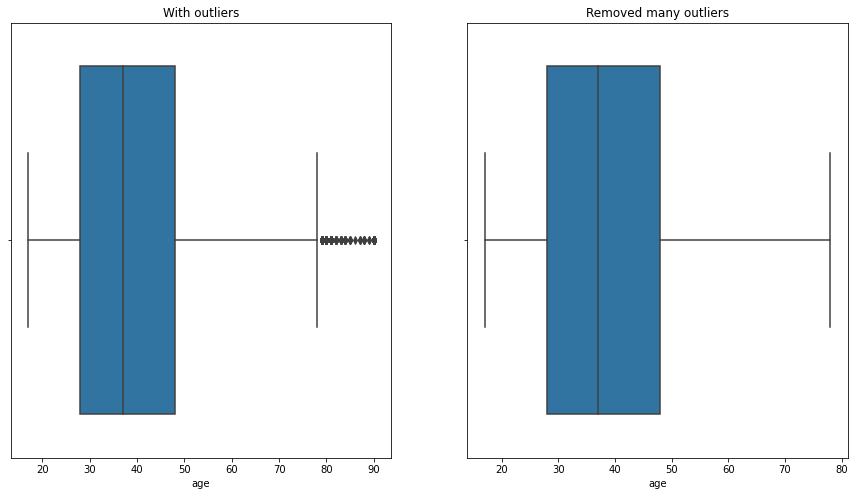

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('With outliers')
sns.boxplot(data['age'])

plt.subplot(1,2,2)
plt.title('Removed many outliers')
sns.boxplot(df['age'])


<Figure size 1080x576 with 0 Axes>

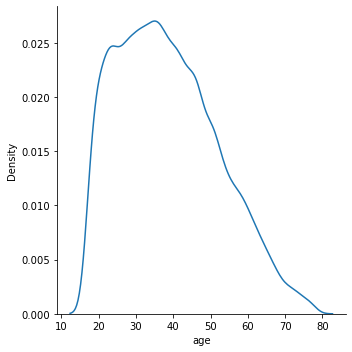

In [15]:
plt.figure(figsize=(15,8))
sns.displot(x=df['age'],kind='kde',palette='rainbow')

<b>Obersvation:- 
    - After removing outliers graph's symmetry improved alot

In [16]:
print("skewness : ",df['age'].skew())
print(" kurtosis : ",df['age'].kurtosis())

skewness :  0.4630788551341054
 kurtosis :  -0.48226097221577957


# Consider Attribute workclass

In [17]:
df['workclass'].value_counts()

Private             32755
Self-emp-not-inc     3744
Local-gov            3052
?                    2663
State-gov            1914
Self-emp-inc         1645
Federal-gov          1371
Without-pay            21
Never-worked            9
Name: workclass, dtype: int64

In [18]:
df['workclass']=df['workclass'].replace('?','Private')
df['workclass']=df['workclass'].replace('Local-gov','Govt employee')
df['workclass']=df['workclass'].replace('State-gov','Govt employee')
df['workclass']=df['workclass'].replace('Self-emp-not-inc','Self employeed')
df['workclass']=df['workclass'].replace('Self-emp-inc','Self employeed')
df['workclass']=df['workclass'].replace('Federal-gov','Govt employee')

In [19]:
df['workclass'].value_counts()

Private           35418
Govt employee      6337
Self employeed     5389
Without-pay          21
Never-worked          9
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

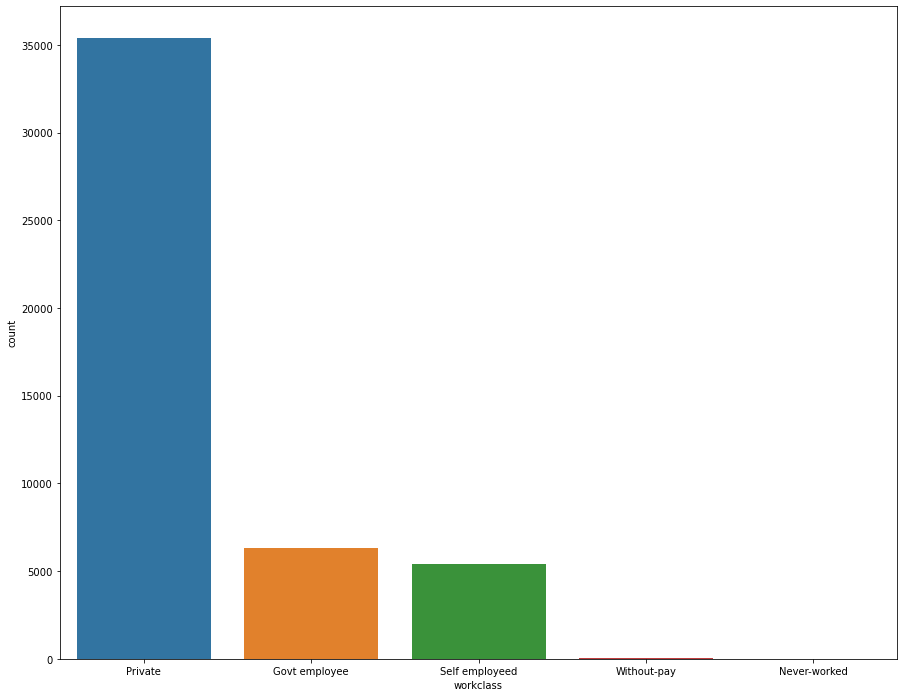

In [20]:
plt.figure(figsize=(15,12))
sns.countplot(df['workclass'])

<b>Observation :-

<AxesSubplot:xlabel='fnlwgt'>

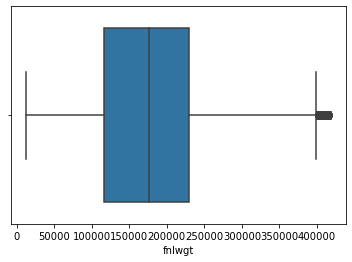

In [21]:
#fnlwgt columns
sns.boxplot(df['fnlwgt'])  #after removing outlier


# marital-status

In [22]:
df['marital-status'].value_counts()

Married-civ-spouse       21650
Never-married            15533
Divorced                  6458
Separated                 1474
Widowed                   1423
Married-spouse-absent      602
Married-AF-spouse           34
Name: marital-status, dtype: int64

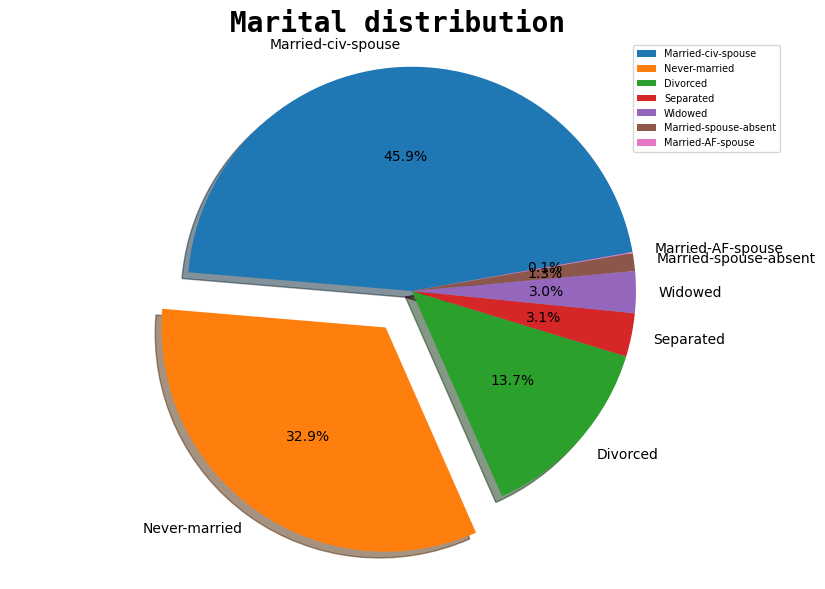

In [23]:
# Creating a pie chart for 'Marital status'
marital = df['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

# Analysing occupation

In [24]:
df['occupation'].value_counts()  #already replace all "?" with np.nan

Prof-specialty       6000
Craft-repair         5914
Exec-managerial      5887
Adm-clerical         5437
Sales                5314
Other-service        4740
Machine-op-inspct    2943
?                    2672
Transport-moving     2272
Handlers-cleaners    1974
Farming-fishing      1421
Tech-support         1404
Protective-serv       950
Priv-house-serv       231
Armed-Forces           15
Name: occupation, dtype: int64

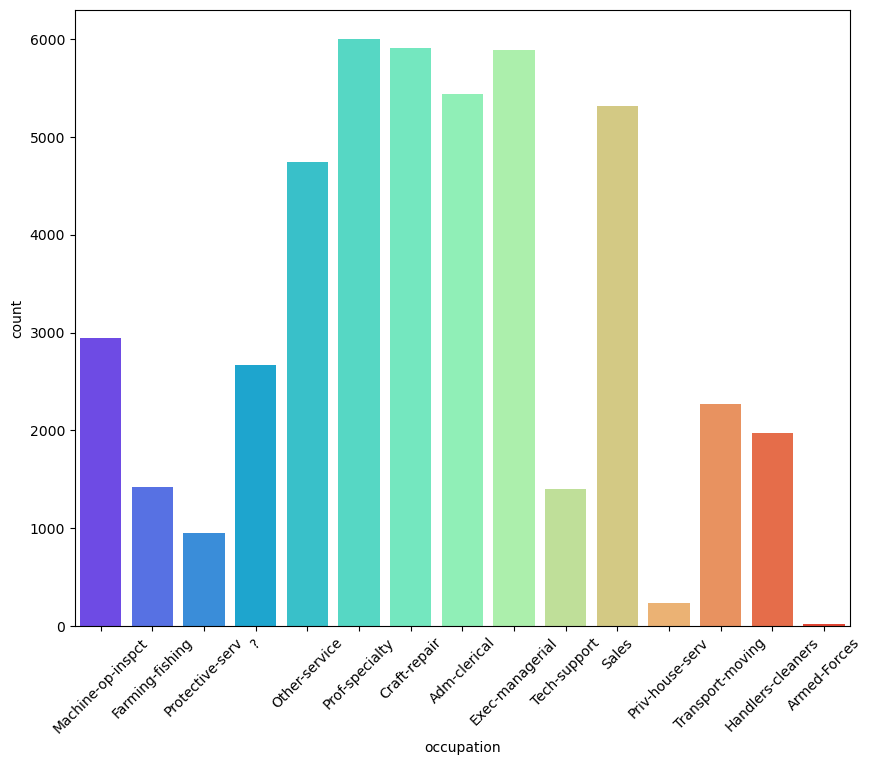

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['occupation'],palette='rainbow')
plt.xticks(rotation=45)
plt.show()

<b>Observation:-
    
    Replaced all  '?' 
    
    By using countplot it is clearly visible that which category of occupation has most values

# Gender

In [26]:
df['gender'].value_counts()

Male      31444
Female    15730
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Gender Distribution'}, xlabel='gender', ylabel='count'>

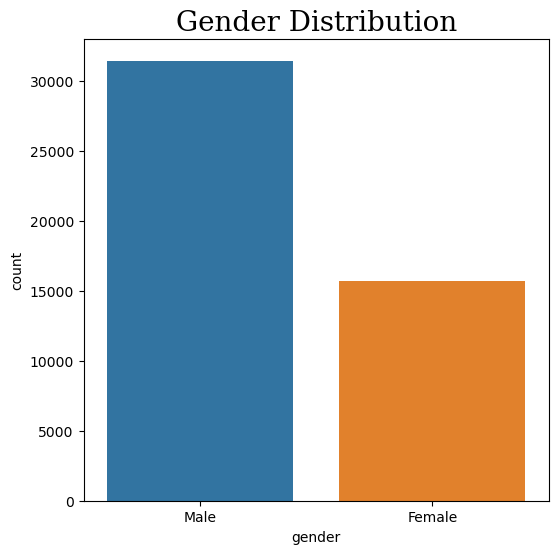

In [27]:
plt.figure(figsize=(6,6))
plt.title("Gender Distribution",fontdict={'fontname': 'serif', 'fontsize': 20})
sns.countplot(df['gender'])

# Income

In [28]:
df['income'].value_counts()

<=50K    35833
>50K     11341
Name: income, dtype: int64

<AxesSubplot:title={'center':'Income Distribution'}, xlabel='income', ylabel='count'>

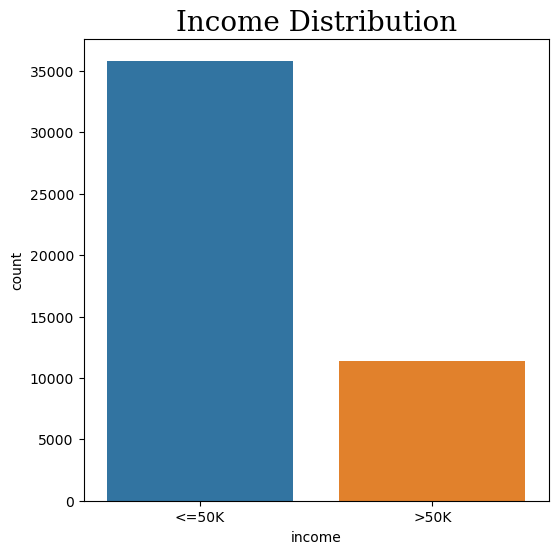

In [29]:
plt.figure(figsize=(6,6))
plt.title("Income Distribution",fontdict={'fontname': 'serif', 'fontsize': 20})
sns.countplot(df['income'])

# Working Hours

In [30]:
work=df['hours-per-week'].value_counts().head(10)

<AxesSubplot:title={'center':'Working Hours Distribution'}, xlabel='Working Hour', ylabel='People'>

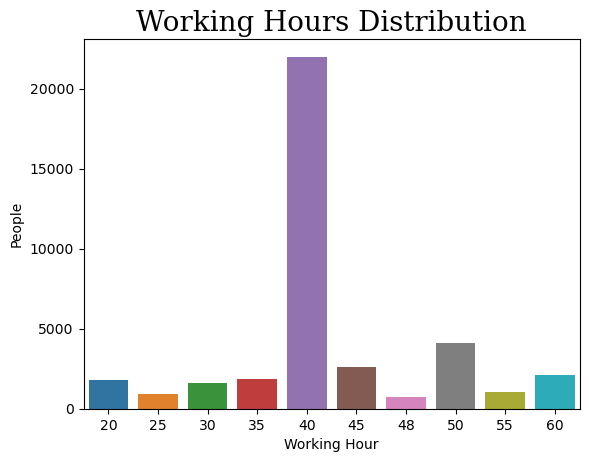

In [31]:
plt.title("Working Hours Distribution",fontdict={'fontname': 'serif', 'fontsize': 20})
plt.xlabel('Working Hour')
plt.ylabel('People')
sns.barplot(work.index,work.values)

# Bivariate Analysis

<AxesSubplot:title={'center':'Income Distribution with education'}, xlabel='education', ylabel='count'>

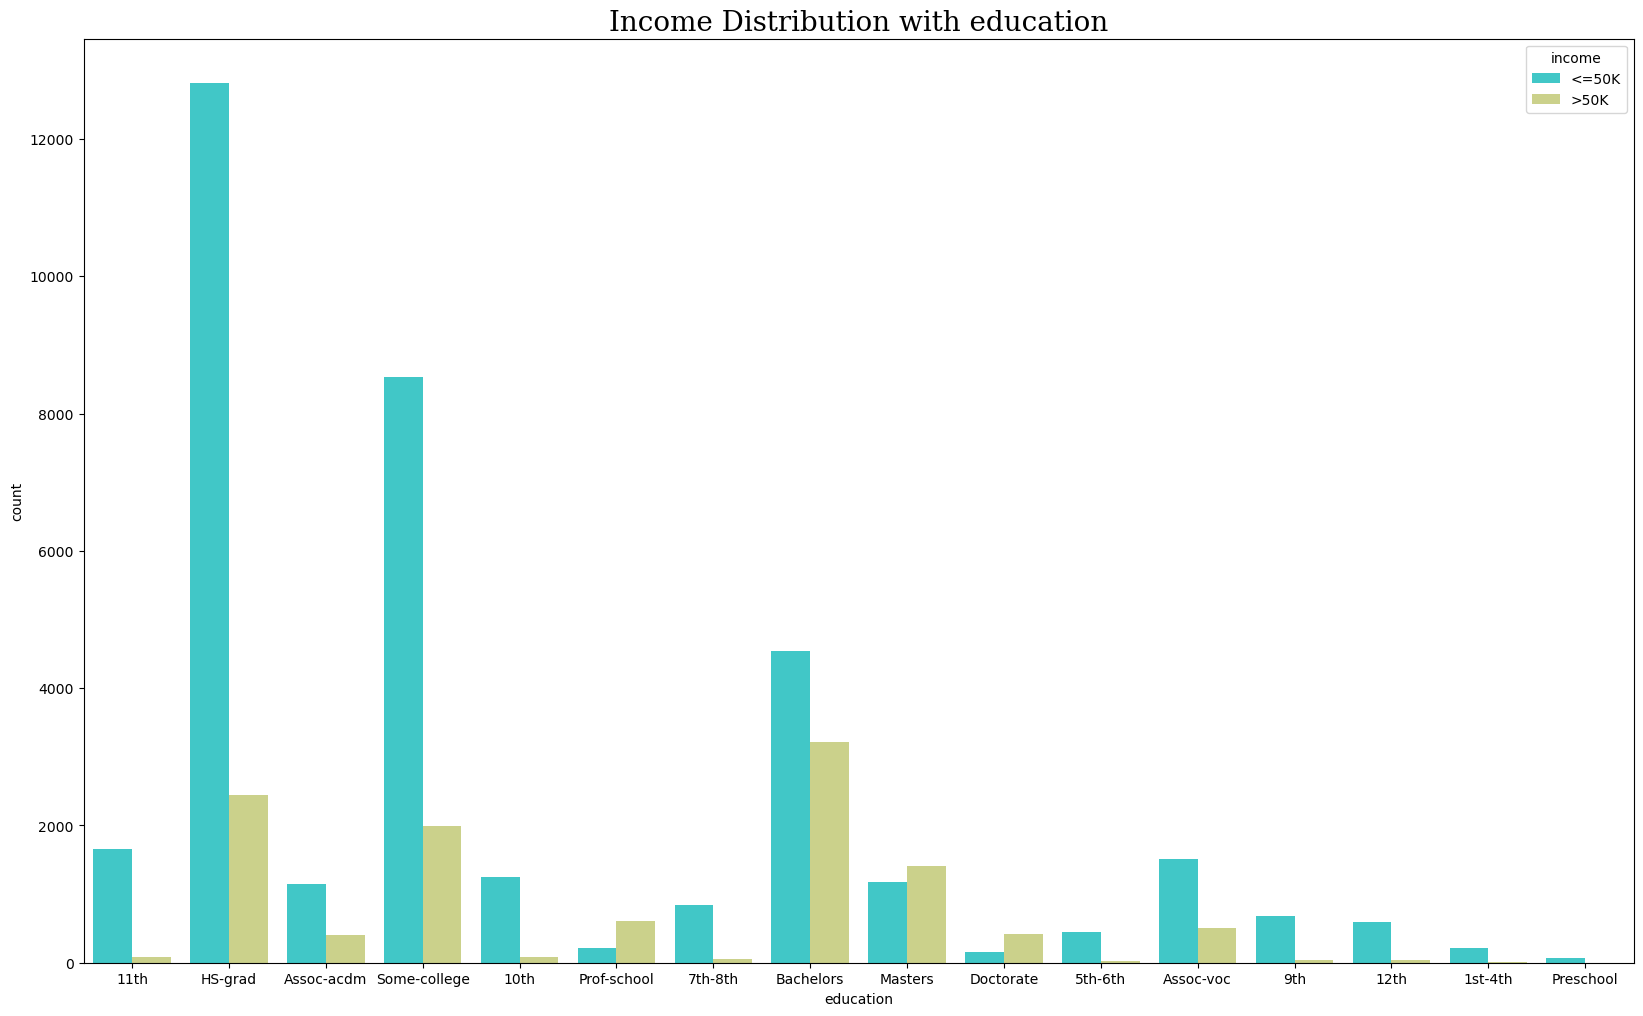

In [32]:
plt.figure(figsize=(20,12))
plt.title("Income Distribution with education",fontdict={'fontname': 'serif', 'fontsize': 20})
sns.countplot(df['education'],
              hue=df['income'], palette='rainbow')

<AxesSubplot:xlabel='gender', ylabel='count'>

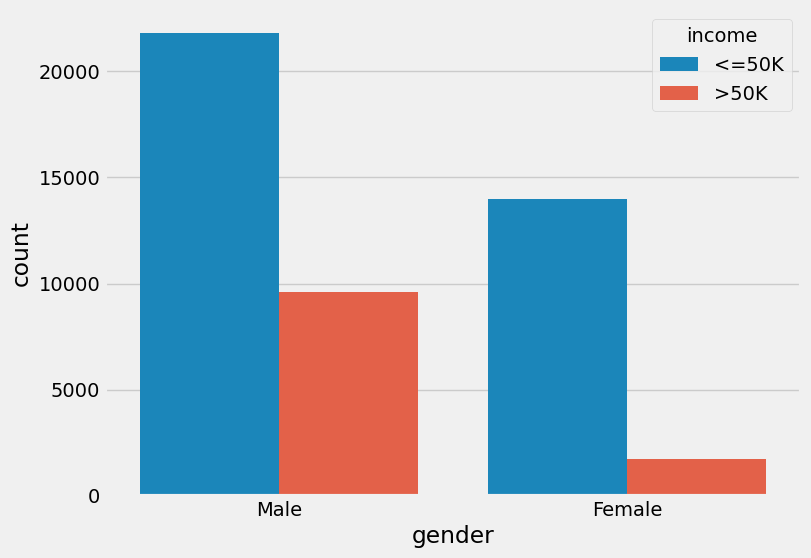

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
plt.xlabel('Gender')

sns.countplot(df['gender'],hue=df['income'])

# Data Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
df['income']=le.fit_transform(df['income'])

In [37]:
df['income'].value_counts()

0    35833
1    11341
Name: income, dtype: int64

In [38]:
df=df.replace('?',np.nan)

In [39]:
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

In [40]:
df.isin([np.nan]).sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2672
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      828
income                0
dtype: int64

In [41]:
col=['occupation','native-country']

In [42]:
for c in col:
    df[c].fillna(df[c].mode()[0], inplace=True)

In [43]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.066908,0.033789,0.078637,0.055280,0.088686,0.237517
fnlwgt,-0.066908,1.000000,-0.031975,-0.003729,0.003184,-0.012385,-0.000033
educational-num,0.033789,-0.031975,1.000000,0.123788,0.081919,0.142550,0.331931
capital-gain,0.078637,-0.003729,0.123788,1.000000,-0.031551,0.080476,0.221669
capital-loss,0.055280,0.003184,0.081919,-0.031551,1.000000,0.055713,0.149147
hours-per-week,0.088686,-0.012385,0.142550,0.080476,0.055713,1.000000,0.227816
income,0.237517,-0.000033,0.331931,0.221669,0.149147,0.227816,1.000000


<AxesSubplot:>

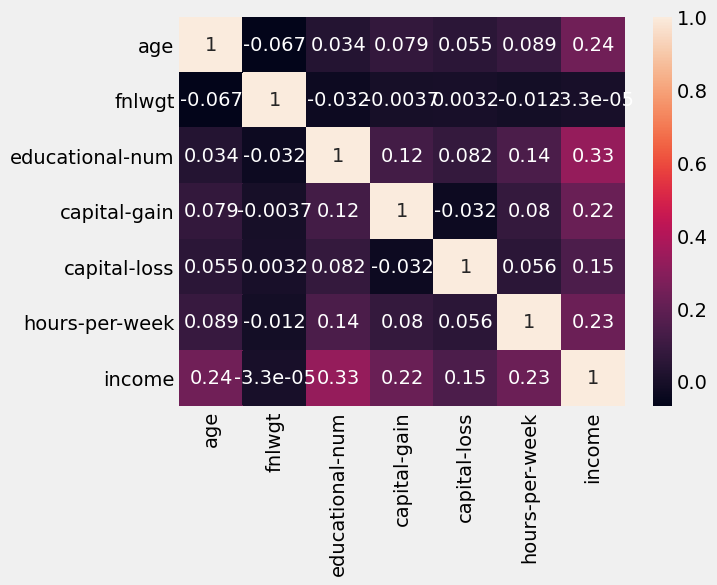

In [44]:
sns.heatmap(df.corr(method='pearson'), annot = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47174 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47174 non-null  int64 
 1   workclass        47174 non-null  object
 2   fnlwgt           47174 non-null  int64 
 3   education        47174 non-null  object
 4   educational-num  47174 non-null  int64 
 5   marital-status   47174 non-null  object
 6   occupation       47174 non-null  object
 7   relationship     47174 non-null  object
 8   race             47174 non-null  object
 9   gender           47174 non-null  object
 10  capital-gain     47174 non-null  int64 
 11  capital-loss     47174 non-null  int64 
 12  hours-per-week   47174 non-null  int64 
 13  native-country   47174 non-null  object
 14  income           47174 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 6.6+ MB


<b>Feature Selection

In [46]:
df= df.drop(['workclass', 'education', 'race', 'capital-loss', 'native-country'], axis=1)

In [47]:
X = df.drop('income', axis=1)
y = df['income']

In [48]:
X.columns

Index(['age', 'fnlwgt', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'gender', 'capital-gain', 'hours-per-week'],
      dtype='object')

<b>Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [51]:
df.head()

,age,fnlwgt,educational-num,marital-status,occupation,relationship,gender,capital-gain,hours-per-week,income
0,25,226802,7,4,6,3,1,0,40,0
1,38,89814,9,2,4,0,1,0,50,0
2,28,336951,12,2,10,0,1,0,40,1
3,44,160323,10,2,6,0,1,7688,40,1
4,18,103497,10,4,9,3,0,0,30,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47174 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              47174 non-null  int64
 1   fnlwgt           47174 non-null  int64
 2   educational-num  47174 non-null  int64
 3   marital-status   47174 non-null  int32
 4   occupation       47174 non-null  int32
 5   relationship     47174 non-null  int32
 6   gender           47174 non-null  int32
 7   capital-gain     47174 non-null  int64
 8   hours-per-week   47174 non-null  int64
 9   income           47174 non-null  int32
dtypes: int32(5), int64(5)
memory usage: 4.1 MB


<b>Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()

In [59]:
sc.fit(df.drop('income', axis=1))

StandardScaler()

In [62]:
X=sc.transform(df.drop('income',axis=1))
y=df['income']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

<b>Model Building

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Score on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Score on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Score on training data: 0.822
Score on test data: 0.820


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [68]:
print(confusion_matrix(y_test,prediction))

[[10153   577]
 [ 1966  1457]]


<AxesSubplot:>

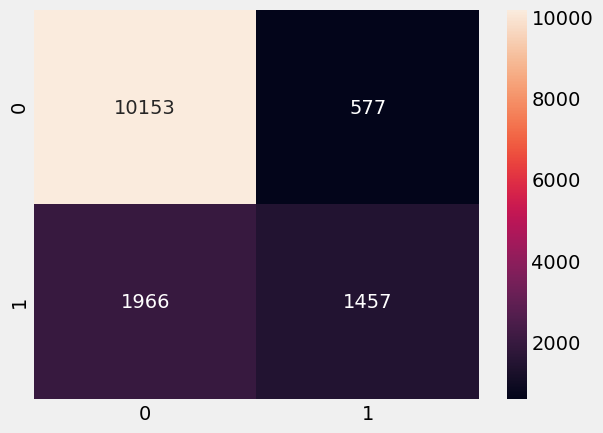

In [75]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True, fmt='d')

# Conclusion

I've performed logistic regression and found that model is giving accuracy of 82%